# Rational
<center>Development for a fitting function (greedy+linear based on mvpolyfit and gmvpfit) that handles rational fucntions</center>

In [1]:
# Low-level import 
from numpy import *
from numpy.linalg import pinv,lstsq
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Setup plotting backend
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.8
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import *
#
from positive import *

## Package Development (positive/learning.py)

### Setup test data

In [79]:
################################################################################
h = 3
Q = 25
x = h*linspace(-1,1,Q) 
y = h*linspace(-1,1,Q) 
X,Y = meshgrid(x,y)
# X += np.random.random( X.shape )-0.5
# Y += np.random.random( X.shape )-0.5

zfun = lambda xx,yy: 50 + (1.0 + (xx+0.5)*(yy+0.2)) / ( 0.9 + xx**2 + yy**2 )
numerator_symbols, denominator_symbols = ['01','0','1'], ['00','11'] 

# zfun = lambda xx,yy: 50 + (1.0 + 2*xx*yy - (xx+0.1)*(yy+0.2)) 
# numerator_symbols, denominator_symbols = ['01','0','1'], ['K'] 

np.random.seed(42)
ns = 0.05*(np.random.random( X.shape )-0.5)
Z = zfun(X,Y) + ns
domain,scalar_range = ndflatten( [X,Y], Z )
################################################################################

### Initiate class object for fitting

In [80]:
foo = mvrfit( domain, scalar_range, numerator_symbols, denominator_symbols, verbose=True )

### Plot using class method

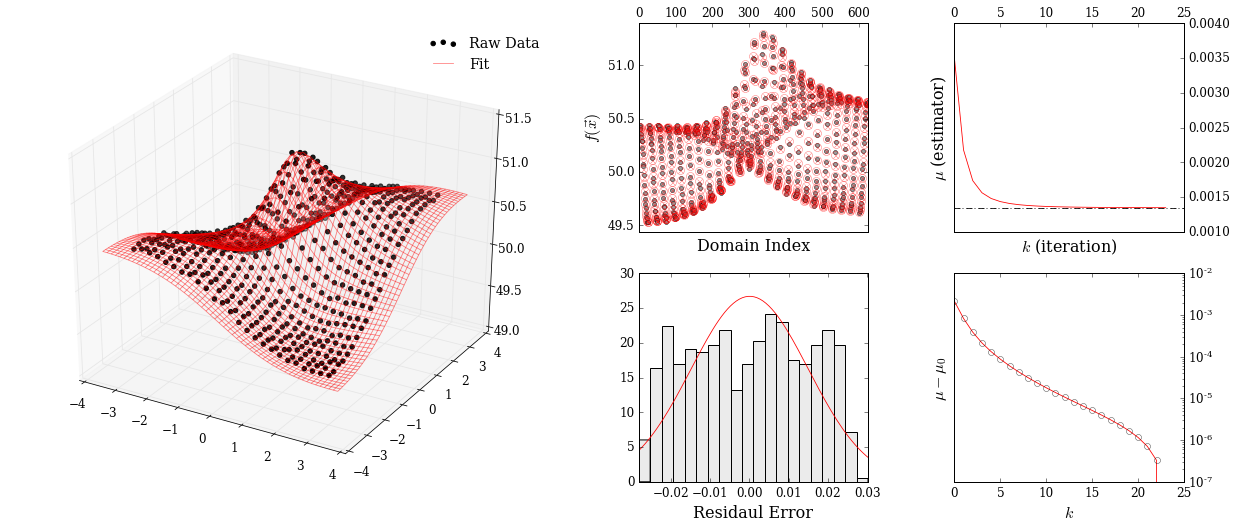

In [81]:
foo.plot()

### Generate python string for fit model

In [73]:
print foo.__str_python__(precision=8)

f = lambda x0,x1: 5.01291674e+01  +  6.30390792e-01 * (  -3.51123778e-01*(x0) + -2.23471997e-01*(x0*x0) + 1.75195089e+00*(x0*x1) + -3.49519496e+00*(x1) + -2.31107925e-01*(x1*x1) + 8.52074443e-01 ) / ( 1.0 +  1.10215804e+00*(x0*x0) + 1.09984296e+00*(x1*x1) )


### Use greedy algorithm

In [74]:
star = gmvrfit( domain, scalar_range, verbose=True )

(gmvrfit)>> Now working deg = 1
&& The estimator has changed by -inf
&& Degree tempering will continue.
False
&& The current boundary is [('1', True)]
&& The current estimator value is 0.705408

(gmvrfit)>> Now working deg = 2
&& The estimator has changed by -0.681769
&& Degree tempering will continue.
False
&& The current boundary is [('1', True), ('01', True), ('11', False), ('00', False), ('11', True), ('00', True), ('0', True)]
&& The current estimator value is 0.023640

(gmvrfit)>> Now working deg = 3
&& The estimator has changed by 0.000000
&& Degree tempering will continue.
False
&& The current boundary is [('1', True), ('01', True), ('11', False), ('00', False), ('11', True), ('00', True), ('0', True)]
&& The current estimator value is 0.023640

(gmvrfit)>> Now working deg = 4
&& The estimator has changed by 0.000007
&& Degree tempering has completed becuase the estimator was made worse by using this max degree. The results of the last iteration wil be kept.
True
&& The Final b

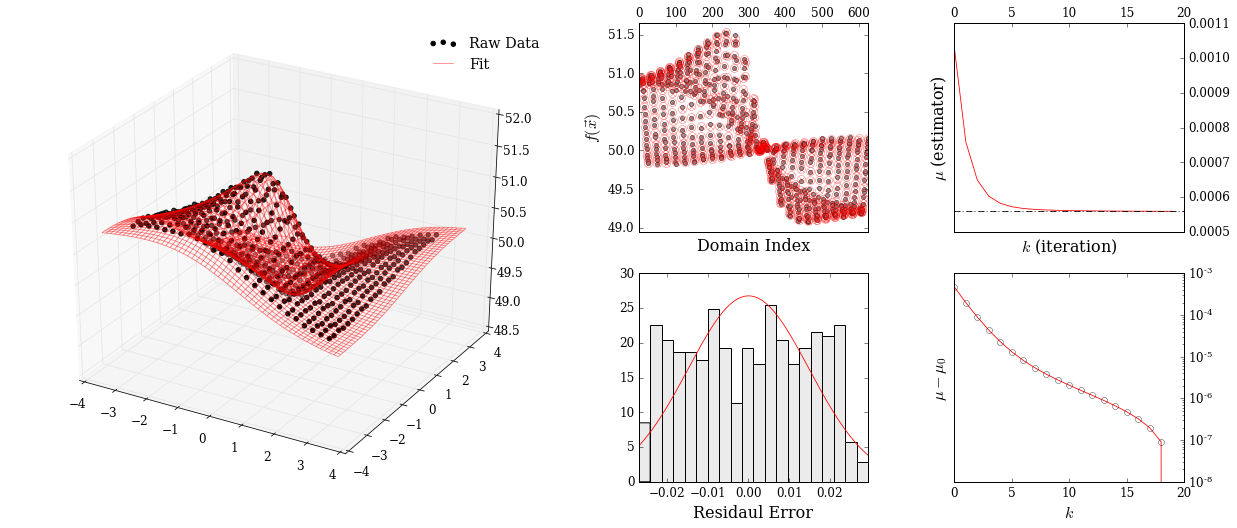

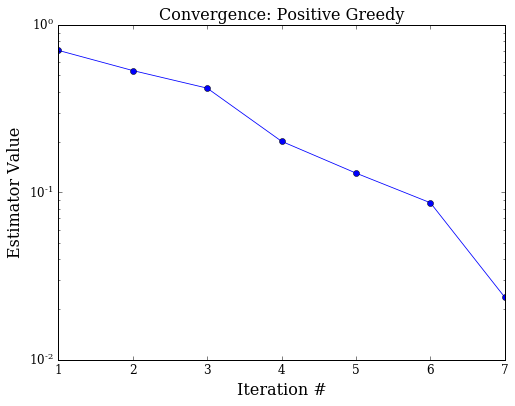

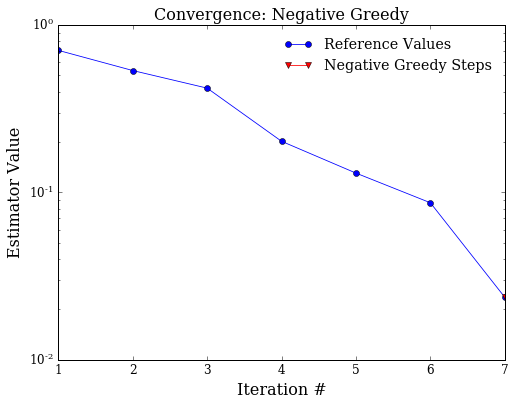

In [75]:
star.plot()
star.bin['pgreedy_result'].plot()
star.bin['ngreedy_result'].plot()